--- Initial Data Head ---
         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
1  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
2  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
3  2010-07-07  3.280  3.326  2.996  3.160      3.160  34608500
4  2010-07-08  3.228  3.504  3.114  3.492      3.492  38557000

--- Initial Data Tail ---
            Date        Open        High         Low       Close   Adj Close  \
2995  2022-05-24  653.530029  653.919983  620.570007  628.159973  628.159973   
2996  2022-05-25  623.849976  669.320007  623.010010  658.799988  658.799988   
2997  2022-05-26  661.419983  718.669983  653.659973  707.729980  707.729980   
2998  2022-05-27  723.250000  759.799988  720.530029  759.630005  759.630005   
2999  2022-05-31  773.840027  778.799988  734.229980  758.260010  758.260010   

        Volume  
2995  29697500  
2996  30713100  
2997  35334400  
2998  29765000  
299

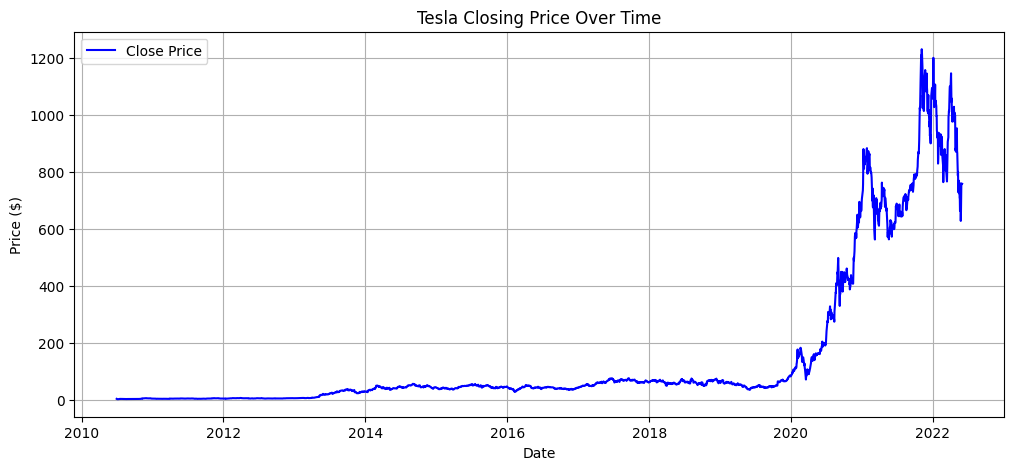

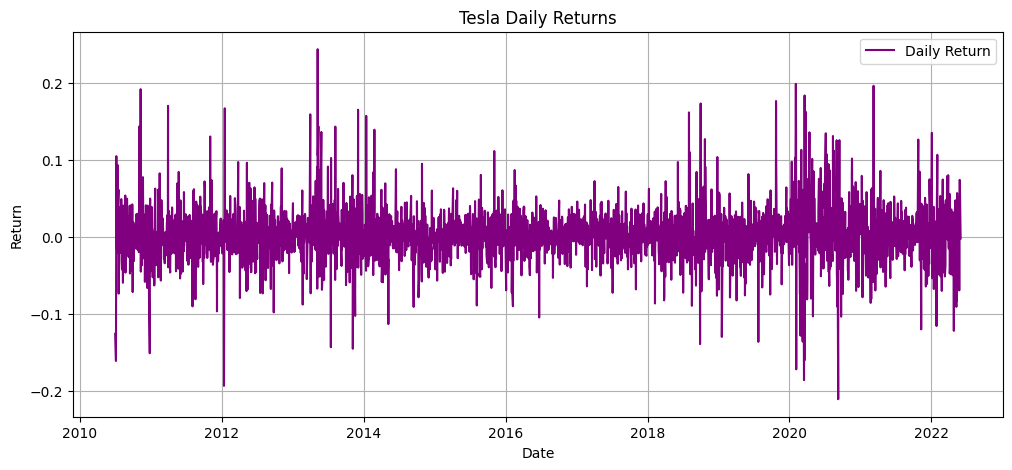

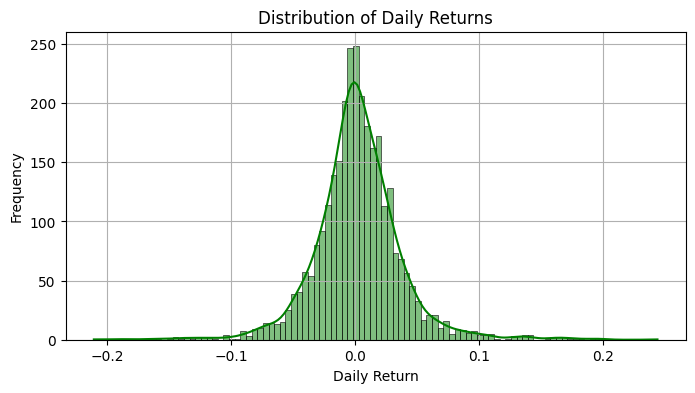

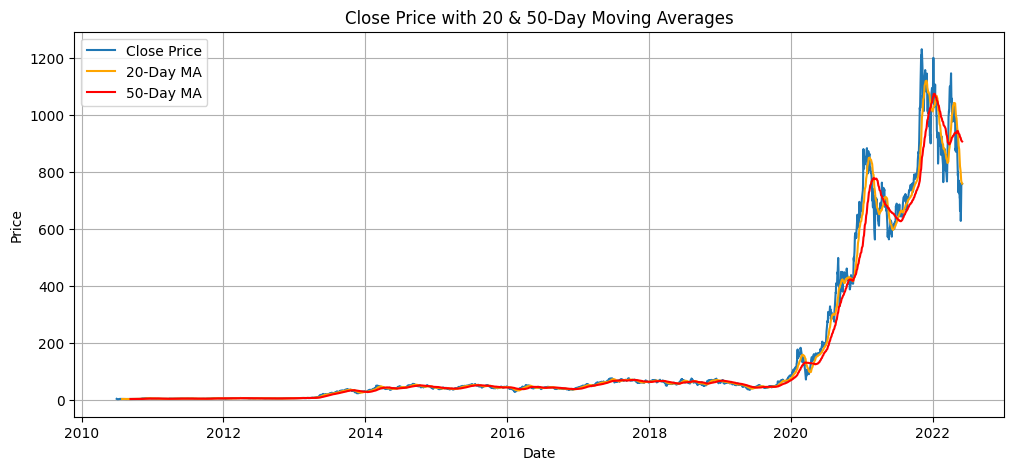

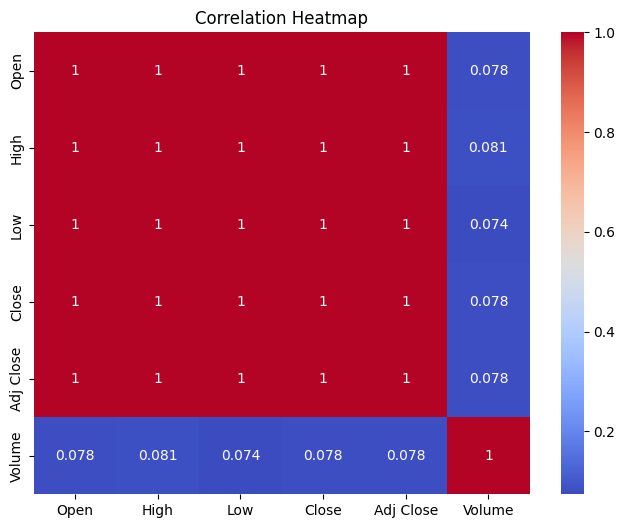


--- Confusion Matrix Example ---
[[3 1]
 [1 2]]

--- Decision Tree Classifier ---
Accuracy: 0.5116666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.14      0.22       299
           1       0.51      0.88      0.64       301

    accuracy                           0.51       600
   macro avg       0.52      0.51      0.43       600
weighted avg       0.52      0.51      0.43       600



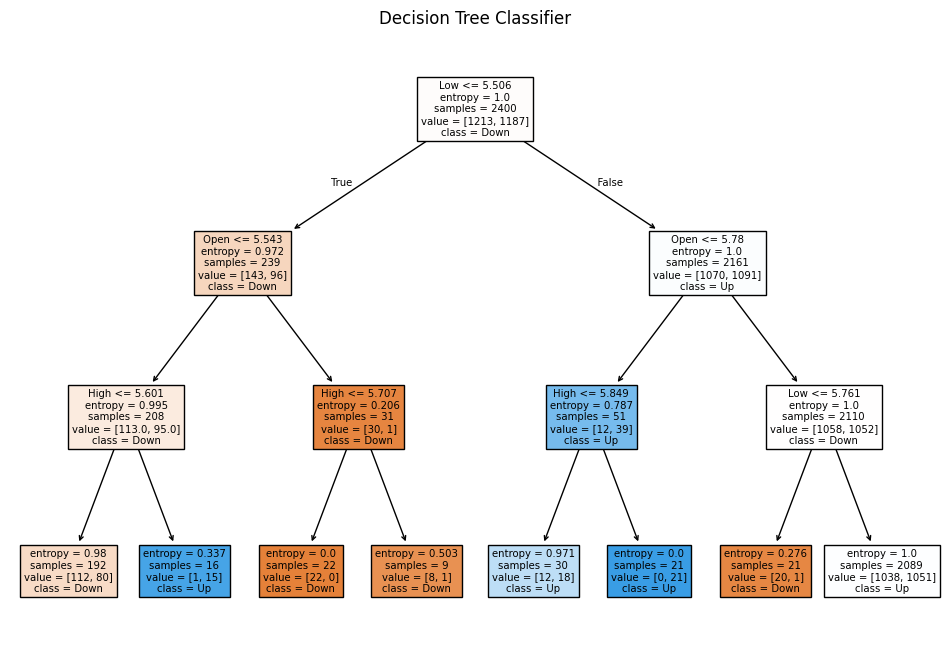


--- PCA ---
        PC1       PC2
0 -1.210332  0.408853
1 -1.238443 -0.145199
2 -1.230007  0.165902
3 -1.232394  0.175883
4 -1.224683  0.317965

--- KNN Classifier ---
Accuracy: 0.5266666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.51      0.52       299
           1       0.53      0.55      0.54       301

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600


--- Gaussian Naive Bayes Classifier ---
Naive Bayes Accuracy: 0.49666666666666665

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.86      0.63       299
           1       0.49      0.13      0.21       301

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.42       600
weighted avg       0.50      0.50      0.42       600


--- Random For

/tmp/ipython-input-6-2230674369.py:256: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_lr = yf.download('TSLA', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 2.0423845830833183
R² Score: 0.9996790820066397


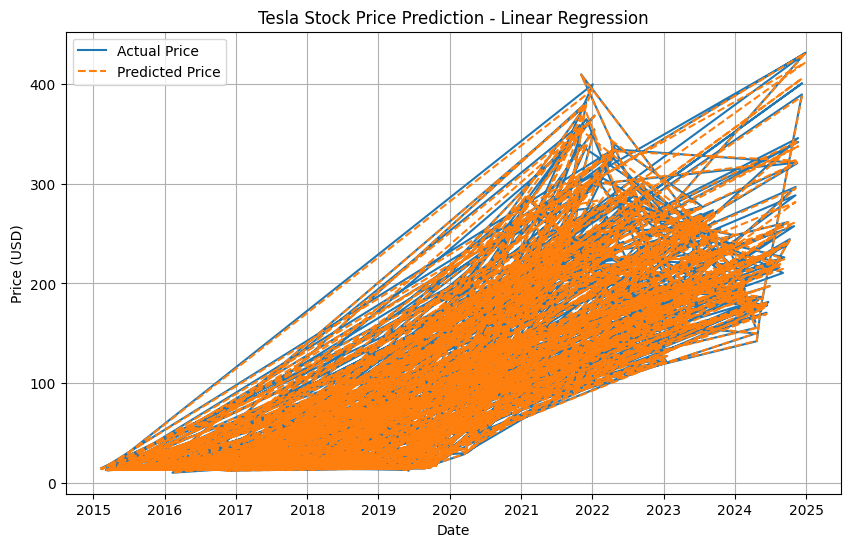

In [6]:
# --- 1. Install necessary libraries (Run this cell first in Colab) ---
!pip install yfinance pandas scikit-learn matplotlib seaborn

# --- 2. Import all necessary libraries at the beginning ---
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score
)

# Financial data library
import yfinance as yf

# --- 3. Data Loading and Initial Exploration (Using the provided CSV) ---
# Ensure your 'TSLA.csv' file is uploaded to '/content/' in Google Colab
data = pd.read_csv("/content/TSLA.csv")

print("--- Initial Data Head ---")
print(data.head())

print("\n--- Initial Data Tail ---")
print(data.tail())

print("\n--- Null Values Before Filling ---")
print(data.isnull().sum()) # Use .sum() for a concise count of nulls per column

# Fill missing values. Using .mean() on numeric_only=True is robust.
# Apply this to a copy if 'data' is intended to remain original for other sections.
# For now, modifying 'data' in place as per original script's intent.
data = data.fillna(data.mean(numeric_only=True))

print("\n--- Null Values After Filling ---")
print(data.isnull().sum())

# Ensure 'Date' column is in datetime format for proper plotting
data['Date'] = pd.to_datetime(data['Date'])

# --- 4. Data Visualization ---

# Tesla Closing Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

# Tesla Daily Returns
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Daily Return'], label='Daily Return', color='purple')
plt.title('Tesla Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.show()

# Distribution of Daily Returns
plt.figure(figsize=(8, 4))
sns.histplot(data['Daily Return'].dropna(), bins=100, color='green', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Close Price with 20 & 50-Day Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA20'], label='20-Day MA', color='orange')
plt.plot(data['Date'], data['MA50'], label='50-Day MA', color='red')
plt.title('Close Price with 20 & 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Correlation Heatmap
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# --- 5. Machine Learning Models ---

# --- A. Confusion Matrix Example (Conceptual) ---
# This part is a standalone example to demonstrate confusion_matrix,
# not directly using the TSLA stock data for its input.
actual = np.array(['Up', 'Down', 'Up', 'Up', 'Down', 'Down', 'Up'])
predicted = np.array(['Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up'])
cm = confusion_matrix(actual, predicted, labels=['Up', 'Down'])
print("\n--- Confusion Matrix Example ---")
print(cm)


# --- B. Decision Tree Classifier ---
print("\n--- Decision Tree Classifier ---")
# Reloading df for each model section ensures a fresh start from the CSV
# if prior modifications (like adding MA, Daily Return) are not desired for that model.
df_dt = pd.read_csv('/content/TSLA.csv')
# Fill NaNs for this specific dataframe as well if it might have them and features are numeric
df_dt = df_dt.fillna(df_dt.mean(numeric_only=True))

df_dt['Price_Up_Down'] = (df_dt['Close'] > df_dt['Open']).astype(int)

features_dt = ['Open', 'High', 'Low', 'Volume']
X_dt = df_dt[features_dt]
y_dt = df_dt['Price_Up_Down']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_dt.fit(X_train_dt, y_train_dt)

y_pred_dt = model_dt.predict(X_test_dt)

print("Accuracy:", accuracy_score(y_test_dt, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_dt, y_pred_dt))

plt.figure(figsize=(12, 8))
plot_tree(model_dt, feature_names=features_dt, class_names=['Down', 'Up'], filled=True)
plt.title('Decision Tree Classifier')
plt.show()


# --- C. PCA (Principal Component Analysis) ---
print("\n--- PCA ---")
df_pca = pd.read_csv("/content/TSLA.csv")
# Ensure any potential NaNs in numeric columns are handled before PCA
df_pca = df_pca.fillna(df_pca.mean(numeric_only=True))

numeric_features_pca = df_pca.select_dtypes(include=['number'])

scaler_pca = StandardScaler()
scaled_data_pca = scaler_pca.fit_transform(numeric_features_pca)

pca = PCA(n_components=2) # Adjust components as needed
principal_components = pca.fit_transform(scaled_data_pca)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca_df.head()) # View the transformed data


# --- D. K-Nearest Neighbors (KNN) Classifier ---
print("\n--- KNN Classifier ---")
df_knn = pd.read_csv("/content/TSLA.csv")
df_knn = df_knn.fillna(df_knn.mean(numeric_only=True)) # Handle NaNs

df_knn['Price_Up_Down'] = (df_knn['Close'] > df_knn['Open']).astype(int)

features_knn = ['Open', 'High', 'Low', 'Volume']
X_knn = df_knn[features_knn]
y_knn = df_knn['Price_Up_Down']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
X_test_scaled_knn = scaler_knn.transform(X_test_knn)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_scaled_knn)

print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test_knn, y_pred_knn))


# --- E. Gaussian Naive Bayes Classifier ---
print("\n--- Gaussian Naive Bayes Classifier ---")
df_nb = pd.read_csv("/content/TSLA.csv")
df_nb = df_nb.fillna(df_nb.mean(numeric_only=True)) # Handle NaNs

df_nb['Price_Up_Down'] = (df_nb['Close'] > df_nb['Open']).astype(int)

features_nb = ['Open', 'High', 'Low', 'Volume']
X_nb = df_nb[features_nb]
y_nb = df_nb['Price_Up_Down']

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

scaler_nb = StandardScaler()
X_train_scaled_nb = scaler_nb.fit_transform(X_train_nb)
X_test_scaled_nb = scaler_nb.transform(X_test_nb)

nb = GaussianNB()
nb.fit(X_train_scaled_nb, y_train_nb)

y_pred_nb = nb.predict(X_test_scaled_nb)
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
report_nb = classification_report(y_test_nb, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("\nClassification Report:\n", report_nb)


# --- F. Random Forest Classifier ---
print("\n--- Random Forest Classifier ---")
df_rf = pd.read_csv("/content/TSLA.csv")
df_rf = df_rf.fillna(df_rf.mean(numeric_only=True)) # Handle NaNs

df_rf['Price_Up_Down'] = (df_rf['Close'] > df_rf['Open']).astype(int)

features_rf = ['Open', 'High', 'Low', 'Volume']
X_rf = df_rf[features_rf]
y_rf = df_rf['Price_Up_Down']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

scaler_rf = StandardScaler()
X_train_scaled_rf = scaler_rf.fit_transform(X_train_rf)
X_test_scaled_rf = scaler_rf.transform(X_test_rf)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_rf, y_train_rf)

y_pred_rf = rf.predict(X_test_scaled_rf)

accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
report_rf = classification_report(y_test_rf, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", report_rf)


# --- G. Linear Regression for Stock Price Prediction (using yfinance) ---
print("\n--- Linear Regression for Stock Price Prediction ---")
# This section uses yfinance to download fresh data, which is a common and good practice.
# Note: This will download data up to the current date, not limited by your TSLA.csv file.
data_lr = yf.download('TSLA', start='2015-01-01', end='2024-12-31')

# Fill any potential NaNs that might arise from the yfinance download (e.g., if market was closed)
data_lr = data_lr.fillna(data_lr.mean(numeric_only=True))

features_lr = ['Open', 'High', 'Low', 'Volume']
target_lr = 'Close'

# Check if the required features exist in the downloaded data before proceeding
if all(col in data_lr.columns for col in features_lr):
    X_lr = data_lr[features_lr]
    y_lr = data_lr[target_lr]

    X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

    model_lr = LinearRegression()
    model_lr.fit(X_train_lr, y_train_lr)

    y_pred_lr = model_lr.predict(X_test_lr)

    rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
    r2_lr = r2_score(y_test_lr, y_pred_lr)

    print("Root Mean Squared Error (RMSE):", rmse_lr)
    print("R² Score:", r2_lr)

    plt.figure(figsize=(10,6))
    # It's good practice to use the index for plotting time series data if available
    # or ensure both y_test_lr and y_pred_lr align by index or reset index.
    plt.plot(y_test_lr.index, y_test_lr.values, label='Actual Price') # Plotting against index
    plt.plot(y_test_lr.index, y_pred_lr, label='Predicted Price', linestyle='--') # Plotting against index
    plt.title('Tesla Stock Price Prediction - Linear Regression')
    plt.xlabel('Date') # Assuming index is Date if yfinance was used
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Warning: Not all required features {features_lr} found in yfinance downloaded data for Linear Regression.")